# Online News Popularity 

### Abstract: This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares in social networks (popularity).

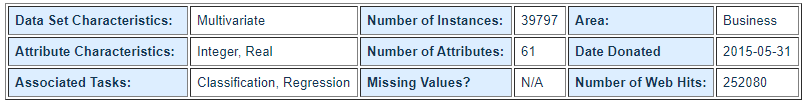

#### Source:
https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity
Kelwin Fernandes (kafc â€˜@â€™ inesctec.pt, kelwinfc â€™@â€™ gmail.com) - INESC TEC, Porto, Portugal/Universidade do Porto, Portugal.
Pedro Vinagre (pedro.vinagre.sousa â€™@â€™ gmail.com) - ALGORITMI Research Centre, Universidade do Minho, Portugal
Paulo Cortez - ALGORITMI Research Centre, Universidade do Minho, Portugal
Pedro Sernadela - Universidade de Aveiro

#### Data Set Information:

* The articles were published by Mashable (www.mashable.com) and their content as the rights to reproduce it belongs to them. Hence, this dataset does not share the original content but some statistics associated with it. The original content be publicly accessed and retrieved using the provided urls.
* Acquisition date: January 8, 2015
* The estimated relative performance values were estimated by the authors using a Random Forest classifier and a rolling windows as assessment method. See their article for more details on how the relative performance values were set.

#### Attribute Information:
Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field)

Attribute Information:
0. url: URL of the article (non-predictive)
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive)
2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content
4. n_unique_tokens: Rate of unique words in the content
5. n_non_stop_words: Rate of non-stop words in the content
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
7. num_hrefs: Number of links
8. num_self_hrefs: Number of links to other articles published by Mashable
9. num_imgs: Number of images
10. num_videos: Number of videos
11. average_token_length: Average length of the words in the content
12. num_keywords: Number of keywords in the metadata
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
14. data_channel_is_entertainment: Is data channel 'Entertainment'?
15. data_channel_is_bus: Is data channel 'Business'?
16. data_channel_is_socmed: Is data channel 'Social Media'?
17. data_channel_is_tech: Is data channel 'Tech'?
18. data_channel_is_world: Is data channel 'World'?
19. kw_min_min: Worst keyword (min. shares)
20. kw_max_min: Worst keyword (max. shares)
21. kw_avg_min: Worst keyword (avg. shares)
22. kw_min_max: Best keyword (min. shares)
23. kw_max_max: Best keyword (max. shares)
24. kw_avg_max: Best keyword (avg. shares)
25. kw_min_avg: Avg. keyword (min. shares)
26. kw_max_avg: Avg. keyword (max. shares)
27. kw_avg_avg: Avg. keyword (avg. shares)
28. self_reference_min_shares: Min. shares of referenced articles in Mashable
29. self_reference_max_shares: Max. shares of referenced articles in Mashable
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
31. weekday_is_monday: Was the article published on a Monday?
32. weekday_is_tuesday: Was the article published on a Tuesday?
33. weekday_is_wednesday: Was the article published on a Wednesday?
34. weekday_is_thursday: Was the article published on a Thursday?
35. weekday_is_friday: Was the article published on a Friday?
36. weekday_is_saturday: Was the article published on a Saturday?
37. weekday_is_sunday: Was the article published on a Sunday?
38. is_weekend: Was the article published on the weekend?
39. LDA_00: Closeness to LDA topic 0
40. LDA_01: Closeness to LDA topic 1
41. LDA_02: Closeness to LDA topic 2
42. LDA_03: Closeness to LDA topic 3
43. LDA_04: Closeness to LDA topic 4
44. global_subjectivity: Text subjectivity
45. global_sentiment_polarity: Text sentiment polarity
46. global_rate_positive_words: Rate of positive words in the content
47. global_rate_negative_words: Rate of negative words in the content
48. rate_positive_words: Rate of positive words among non-neutral tokens
49. rate_negative_words: Rate of negative words among non-neutral tokens
50. avg_positive_polarity: Avg. polarity of positive words
51. min_positive_polarity: Min. polarity of positive words
52. max_positive_polarity: Max. polarity of positive words
53. avg_negative_polarity: Avg. polarity of negative words
54. min_negative_polarity: Min. polarity of negative words
55. max_negative_polarity: Max. polarity of negative words
56. title_subjectivity: Title subjectivity
57. title_sentiment_polarity: Title polarity
58. abs_title_subjectivity: Absolute subjectivity level
59. abs_title_sentiment_polarity: Absolute polarity level
60. shares: Number of shares (target)


In [135]:
# To extract all keywords in python 3.6 use the below code

import keyword

# Import basic packages
import numpy as np                                          # Implemennts milti-dimensional array and matrices
import pandas as pd                                         # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                             # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                       # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output                                 
                                                                               
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [136]:
%%HTML                                 
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border-style: solid;
        border: 3px solid lightgray;
    }
</style>

In [137]:
data = pd.read_csv('https://raw.githubusercontent.com/omsarmalkar/Machine-Learning/ML---Project-3/OnlineNewsPopularity.csv', index_col=0, skipinitialspace=True)
data.head()

timedelta  n_tokens_title  \
url                                                                             
http://mashable.com/2013/01/07/amazon-instant-v...      731.0            12.0   
http://mashable.com/2013/01/07/ap-samsung-spons...      731.0             9.0   
http://mashable.com/2013/01/07/apple-40-billion...      731.0             9.0   
http://mashable.com/2013/01/07/astronaut-notre-...      731.0             9.0   
http://mashable.com/2013/01/07/att-u-verse-apps/        731.0            13.0   

                                                    n_tokens_content  \
url                                                                    
http://mashable.com/2013/01/07/amazon-instant-v...             219.0   
http://mashable.com/2013/01/07/ap-samsung-spons...             255.0   
http://mashable.com/2013/01/07/apple-40-billion...             211.0   
http://mashable.com/2013/01/07/astronaut-notre-...             531.0   
http://mashable.com/2013/01/07/att-u-verse-apps/              1072.0   

                                                    n_unique_tokens  \
url                                                                   
http://mashable.com/2013/01/07/amazon-instant-v...         0.663594   
http://mashable.com/2013/01/07/ap-samsung-spons...         0.604743   
http://mashable.com/2013/01/07/apple-40-billion...         0.575130   
http://mashable.com/2013/01/07/astronaut-notre-...         0.503788   
http://mashable.com/2013/01/07/att-u-verse-apps/           0.415646   

                                                    n_non_stop_words  \
url                                                                    
http://mashable.com/2013/01/07/amazon-instant-v...               1.0   
http://mashable.com/2013/01/07/ap-samsung-spons...               1.0   
http://mashable.com/2013/01/07/apple-40-billion...               1.0   
http://mashable.com/2013/01/07/astronaut-notre-...               1.0   
http://mashable.com/2013/01/07/att-u-verse-apps/                 1.0   

                                                    n_non_stop_unique_tokens  \
url                                                                            
http://mashable.com/2013/01/07/amazon-instant-v...                  0.815385   
http://mashable.com/2013/01/07/ap-samsung-spons...                  0.791946   
http://mashable.com/2013/01/07/apple-40-billion...                  0.663866   
http://mashable.com/2013/01/07/astronaut-notre-...                  0.665635   
http://mashable.com/2013/01/07/att-u-verse-apps/                    0.540890   

                                                    num_hrefs  num_self_hrefs  \
url                                                                             
http://mashable.com/2013/01/07/amazon-instant-v...        4.0             2.0   
http://mashable.com/2013/01/07/ap-samsung-spons...        3.0             1.0   
http://mashable.com/2013/01/07/apple-40-billion...        3.0             1.0   
http://mashable.com/2013/01/07/astronaut-notre-...        9.0             0.0   
http://mashable.com/2013/01/07/att-u-verse-apps/         19.0            19.0   

                                                    num_imgs  num_videos  ...  \
url                                                                       ...   
http://mashable.com/2013/01/07/amazon-instant-v...       1.0         0.0  ...   
http://mashable.com/2013/01/07/ap-samsung-spons...       1.0         0.0  ...   
http://mashable.com/2013/01/07/apple-40-billion...       1.0         0.0  ...   
http://mashable.com/2013/01/07/astronaut-notre-...       1.0         0.0  ...   
http://mashable.com/2013/01/07/att-u-verse-apps/        20.0         0.0  ...   

                                                    min_positive_polarity  \
url                                                                         
http://mashable.com/2013/01/07/amazon-instant-v...               0.100000   
http://mashable.com/2013/01/07/ap-samsung-spons.

In [138]:
data.shape  

(39644, 60)

In [139]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 39644 entries, http://mashable.com/2013/01/07/amazon-instant-video-browser/ to http://mashable.com/2014/12/27/youtube-channels-2015/
Data columns (total 60 columns):
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_

In [140]:
data.describe(include='all')

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  39644.000000    39644.000000      39644.000000     39644.000000   
mean     354.530471       10.398749        546.514731         0.548216   
std      214.163767        2.114037        471.107508         3.520708   
min        8.000000        2.000000          0.000000         0.000000   
25%      164.000000        9.000000        246.000000         0.470870   
50%      339.000000       10.000000        409.000000         0.539226   
75%      542.000000       12.000000        716.000000         0.608696   
max      731.000000       23.000000       8474.000000       701.000000   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      39644.000000              39644.000000  39644.000000   
mean           0.996469                  0.689175     10.883690   
std            5.231231                  3.264816     11.332017   
min            0.000000                  0.000000      0.000000   
25%            1.000000                  0.625739      4.000000   
50%            1.000000                  0.690476      8.000000   
75%            1.000000                  0.754630     14.000000   
max         1042.000000                650.000000    304.000000   

       num_self_hrefs      num_imgs    num_videos  ...  min_positive_polarity  \
count    39644.000000  39644.000000  39644.000000  ...           39644.000000   
mean         3.293638      4.544143      1.249874  ...               0.095446   
std          3.855141      8.309434      4.107855  ...               0.071315   
min          0.000000      0.000000      0.000000  ...               0.000000   
25%          1.000000      1.000000      0.000000  ...               0.050000   
50%          3.000000      1.000000      0.000000  ...               0.100000   
75%          4.000000      4.000000      1.000000  ...               0.100000   
max        116.000000    128.000000     91.000000  ...               1.000000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
count           39644.000000           39644.000000           39644.000000   
mean                0.756728              -0.259524              -0.521944   
std                 0.247786               0.127726               0.290290   
min                 0.000000              -1.000000              -1.000000   
25%                 0.600000              -0.328383              -0.700000   
50%                 0.800000              -0.253333              -0.500000   
75%                 1.000000              -0.186905              -0.300000   
max                 1.000000               0.000000               0.000000   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
count           39644.000000        39644.000000              39644.000000   
mean               -0.107500            0.282353                  0.071425   
std                 0.095373            0.324247                  0.265450   
min                -1.000000            0.000000                 -1.000000   
25%                -0.125000            0.000000                  0.000000   
50%                -0.100000            0.150000                  0.000000   
75%                -0.050000            0.500000                  0.150000   
max                 0.000000            1.000000                  1.000000   

       abs_title_subjectivity  abs_title_sentiment_polarity         shares  
count            39644.000000                  39644.000000   39644.000000  
mean                 0.341843                      0.156064    3395.380184  
std                  0.188791                      0.226294   11626.950749  
min                  0.000000                      0.000000       1.000000  
25%                  0.166667                      0.000000     946.000000  
50%                  0.500000                      0.000000    1400.000000  
75%                  0.500000                      0.250000    2

In [141]:
pandas_profiling.ProfileReport(data) 

Removal of following columns

- URL



In [142]:
data = data.reset_index()   
data = data.drop(['url','timedelta'], axis = 1)
data.sample()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
30872             9.0             223.0         0.681818               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
30872                  0.817518        1.0             1.0       1.0   

       num_videos  average_token_length  ...  min_positive_polarity  \
30872         2.0              4.766816  ...                 0.0625   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
30872                    0.7              -0.277083                   -0.6   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
30872              -0.083333                 0.0                       0.0   

       abs_title_subjectivity  abs_title_sentiment_polarity  shares  
30872                     0.5                           0.0     913  

[1 rows x 59 columns]

In [143]:
data.isnull().sum().any()

False

## UNIVARIATE ANALYSIS OF THE TARGET FIELD

- Let's pick the __target__ field and try to analyse it.


In [144]:
data.shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

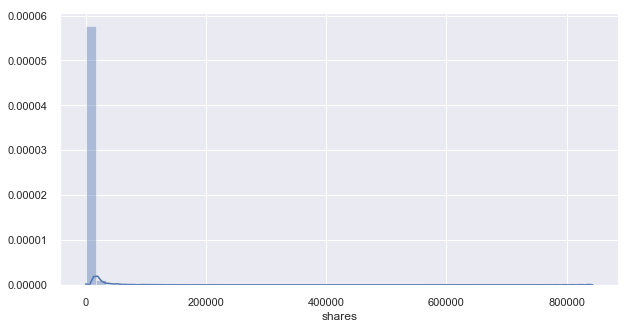

In [145]:
plt.figure(figsize=(10,5))
sns.distplot(data['shares'])

# value['target'].hist()

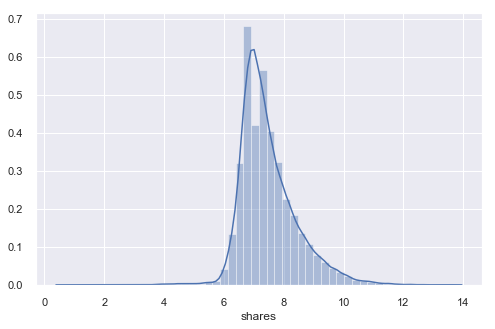

In [146]:
plt.figure(figsize=(8,5))
sns.distplot(np.log1p(data['shares']), kde='False')

In [147]:
np.log1p(data['shares']).describe()

count    39644.000000
mean         7.475692
std          0.929674
min          0.693147
25%          6.853299
50%          7.244942
75%          7.937732
max         13.645079
Name: shares, dtype: float64

### Plotting a scatter plot of target variable with column 'self_reference_avg_sharess' to check the spread.



C:\Python\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


Text(0, 0.5, 'shares')

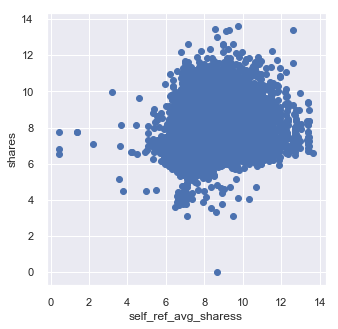

In [148]:
plt.figure(figsize=(5,5))
plt.scatter(np.log(data['self_reference_avg_sharess']),np.log(data['shares']))
plt.xlabel('self_ref_avg_sharess')
plt.ylabel('shares')

In [149]:
cols = data.columns
cols

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

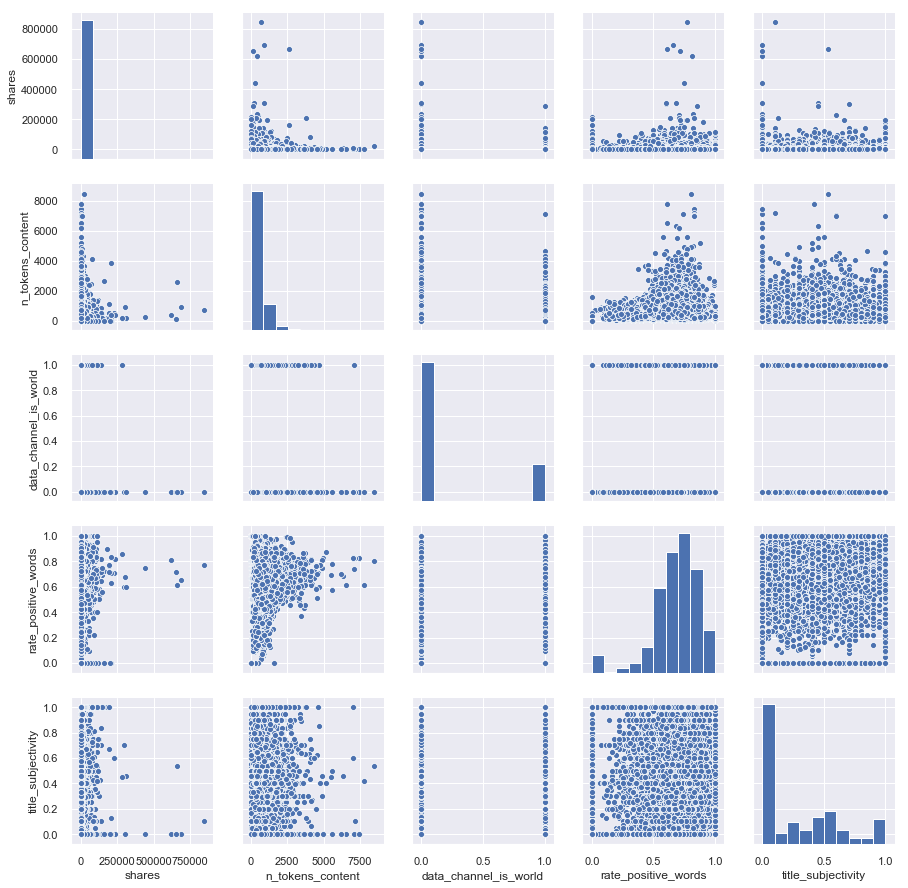

In [150]:

data_subset = data[['shares',	'n_tokens_content',	'data_channel_is_world',	'rate_positive_words'	,'title_subjectivity']]
sns.pairplot(data_subset)

### Perform some basic checks on the target column

In [151]:
data['shares'].sort_values(ascending=False)

9365     843300
5370     690400
23237    663600
16268    652900
3145     617900
16009    441000
18788    310800
4506     306100
16113    298400
35256    284700
14757    233400
3043     227300
37590    211600
9853     210300
18488    208300
17020    205600
37873    200100
18037    197600
9575     196700
18055    193400
17267    180600
36995    161600
16989    158900
23585    145500
25008    144900
3139     144400
12072    143100
23514    141400
16642    139600
18850    139500
          ...  
36421        54
37828        53
38730        52
9369         51
32900        50
38890        50
31780        49
32443        49
10368        49
33365        48
9671         48
8245         47
9307         45
30295        44
36416        43
27070        43
10378        42
38570        42
7958         41
35193        36
28694        35
34453        28
35327        28
9707         23
18957        22
34398        22
9771          8
38633         5
4709          4
17266         1
Name: shares, Length: 39

### Plot a boxplot on the log value of the target variable

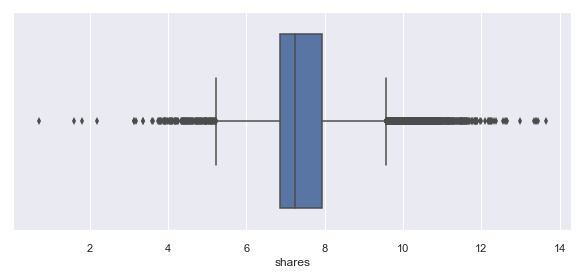

In [152]:
plt.figure(figsize=(10,4))
sns.boxplot(np.log1p(data['shares']), orient='h')

### Checking and dropping constand columns

In [153]:
drop_cols=[]
for cols in data.columns:
    if data[cols].std()==0:
        drop_cols.append(cols)
print("Number of constant columns to be dropped: ", len(drop_cols))
print(drop_cols)
data1 = data.drop(drop_cols,axis=1, inplace = True)
data1

Number of constant columns to be dropped:  0
[]


In [154]:
data.shape

(39644, 59)

In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
data_sc = pd.DataFrame(scaler.transform(data), index=data.index, columns=data.columns)
data_sc = pd.DataFrame(data_sc)
data_sc.sample()

C:\Python\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Python\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
17075       -0.661657          0.257875        -0.004111          0.000675   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
17075                 -0.002151   0.627991       -0.076169  0.776941   

       num_videos  average_token_length  ...  min_positive_polarity  \
17075   -0.304268              0.295673  ...               0.063865   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
17075               0.981798              -2.839699              -1.646847   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
17075              -0.969886            1.442271                 -1.210884   

       abs_title_subjectivity  abs_title_sentiment_polarity    shares  
17075               -0.486485                      0.415112 -0.154417  

[1 rows x 59 columns]

In [156]:
print(data_sc[:5])

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0        0.757447         -0.695210         0.032772          0.000675   
1       -0.661657         -0.618794         0.016056          0.000675   
2       -0.661657         -0.712192         0.007645          0.000675   
3       -0.661657         -0.032933        -0.012619          0.000675   
4        1.230482          1.115439        -0.037655          0.000675   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.038658  -0.607463       -0.335566 -0.426526   -0.304268   
1                  0.031479  -0.695709       -0.594963 -0.426526   -0.304268   
2                 -0.007752  -0.695709       -0.594963 -0.426526   -0.304268   
3                 -0.007211  -0.166229       -0.854360 -0.426526   -0.304268   
4                 -0.045420   0.716237        4.074185  1.860061   -0.304268   

   average_token_length  ...  min_positive_polarity  max_positive_polarity

### Splitting X and y into train and test dataset

In [157]:
X = data_sc.loc[:,data_sc.columns != 'shares']
X.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0        0.757447         -0.695210         0.032772          0.000675   
1       -0.661657         -0.618794         0.016056          0.000675   
2       -0.661657         -0.712192         0.007645          0.000675   
3       -0.661657         -0.032933        -0.012619          0.000675   
4        1.230482          1.115439        -0.037655          0.000675   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.038658  -0.607463       -0.335566 -0.426526   -0.304268   
1                  0.031479  -0.695709       -0.594963 -0.426526   -0.304268   
2                 -0.007752  -0.695709       -0.594963 -0.426526   -0.304268   
3                 -0.007211  -0.166229       -0.854360 -0.426526   -0.304268   
4                 -0.045420   0.716237        4.074185  1.860061   -0.304268   

   average_token_length  ...  avg_positive_polarity  min_positive_polarity  \
0              0.156474  ...               0.237337               0.063865   
1              0.432838  ...              -0.640040              -0.870968   
2             -0.183415  ...               1.358401               0.063865   
3             -0.169758  ...               0.307442               0.573773   
4              0.159400  ...               0.548135              -0.870968   

   max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0              -0.228941              -0.708369              -0.268895   
1              -0.228941               1.102174               1.367424   
2               0.981798              -1.621797              -0.957871   
3               0.174639              -0.862584              -0.268895   
4               0.981798               0.307944               0.075594   

   max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0              -0.969886            0.671245                 -0.975432   
1               0.078642           -0.870807                 -0.269076   
2              -0.270867           -0.870807                 -0.269076   
3              -0.620377           -0.870807                 -0.269076   
4               0.602906            0.531059                  0.244637   

   abs_title_subjectivity  abs_title_sentiment_polarity  
0               -1.810719                      0.138920  
1                0.837749                     -0.689658  
2                0.837749                     -0.689658  
3                0.837749                     -0.689658  
4               -1.569949                     -0.087056  

[5 rows x 58 columns]

In [158]:
y = np.log1p(data_sc.loc[:,data_sc.columns == 'shares'])
y.head()

shares
0 -0.275790
1 -0.262506
2 -0.177953
3 -0.209266
4 -0.285812

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(31715, 58)
(31715, 1)
(7929, 58)
(7929, 1)


### Fit the model and calculate the computing time

In [160]:
import time
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(random_state =0)
start_time = time.time()
rfc.fit(X_train,y_train)
end_time = time.time()
time1 = end_time-start_time
print(time1)

C:\Python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Python\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


20.96914029121399


### Use the model for predictions

In [161]:
predictions = rfc.predict(X_test)

### Use RMSE for model evaluation

In [162]:
from sklearn import metrics
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for test set is 0.3013673531200463


## DIMENSIONALITY REDUCTION
- One of the major problems with this dataset is that it has too many predictors (almost 4900+). To go through each of these predictors and see which ones are significant for the model is going to be a tedious task. Instead, we can use one of the all-time favourite dimensionality reduction technique - Principle Component Analysis.
- Before we can use PCA, we need to **STANDARDISE** the data (Standardisation and Normalization are used inter-dependently. Standardisation is moulding the data to between -1 and +1 data points. Normalisation is normalising the data so that the data points lie along the mean.)

In [163]:
from sklearn.decomposition import PCA
pca = PCA(0.95).fit(X)

#### Variance Graph

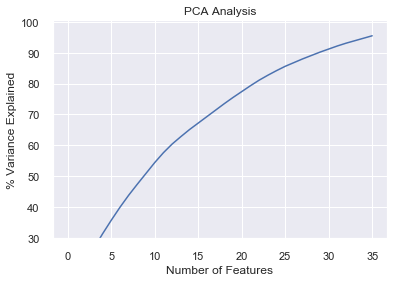

In [164]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [165]:
print('%d components explain 95%% of the variation in data' % pca.n_components_)

36 components explain 95% of the variation in data


In [166]:
pca = PCA(n_components=36, random_state = 0)
pca.fit(X)
X_36 = pca.transform(X)
print(X_36.shape)

(39644, 36)


### Split the random variable in train and test data

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_36, y, test_size=0.25, random_state=1)
print(X_train.shape)
print(X_test.shape)

(29733, 36)
(9911, 36)


In [168]:
import time
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
start_time = time.time()
rf.fit(X_train, y_train)
end_time = time.time()
time2 = end_time-start_time
print(time2)

C:\Python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Python\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


23.22352695465088


### Use the model for predictions

In [169]:
predictions_pca = rf.predict(X_test)

In [170]:
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, predictions_pca))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for test set is 0.31225729467185


In [171]:
%time
pca = PCA(n_components=36, random_state = 0)
pca.fit(X)
X_36 = pca.transform(X)
print(X_36.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_36, y, test_size=0.25, random_state=1)

import time
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
start_time = time.time()
rf.fit(X_train, y_train)
end_time = time.time()
time2 = end_time-start_time
print(time2)

predictions_pca = rf.predict(X_test)
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, predictions_pca))
print('RMSE for test set is {}'.format(RMSE_test))

predictions_pca_exp = np.expm1(predictions_pca)


Wall time: 0 ns
(39644, 36)


C:\Python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Python\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


23.766249418258667
RMSE for test set is 0.3142764334352387


In [172]:
predictions_pca = rf.predict(X_test)
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, predictions_pca_exp))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for test set is 0.324023622179287


In [173]:
X_36

array([[-0.76612612, -1.34733042, -1.93385332, ...,  0.61737196,
        -0.17925253,  0.13289116],
       [ 1.05864666, -3.65712735, -1.2953494 , ...,  0.35495433,
         0.81835617,  0.01184875],
       [-2.99726657, -3.44320101, -2.02611694, ..., -0.19192522,
        -0.64246378, -0.74032267],
       ...,
       [-0.0463835 ,  2.42331202,  0.22108104, ...,  0.07673263,
        -0.6832165 , -0.50625983],
       [ 3.37761304,  0.67692164, -3.15476459, ..., -0.12276843,
        -0.01911562,  0.18565986],
       [ 0.42887636,  0.13458342,  2.21102895, ..., -0.27072173,
        -0.42759068, -0.37819119]])

### Using 'exponents' to get back to the original value of target variable.

In [174]:
predictions_pca_exp = np.expm1(predictions_pca)
print(len(predictions_pca_exp))
print(predictions_pca_exp[:20])

9911
[ 0.48854227 -0.18083082  0.17487955 -0.11726858 -0.09750535  0.0156598
 -0.09031918 -0.10767138 -0.13782913 -0.10760946 -0.04490618 -0.04147514
  0.02420422  0.22295602 -0.14259905  0.20309512  0.02515198 -0.17985121
 -0.06300251  0.33257822]


### Model evaluation using metrics

In [175]:
from sklearn import metrics
MAE_test = metrics.mean_absolute_error(y_test, predictions_pca_exp)
print('MAE for test data set is {}'.format(MAE_test))

MAE for test data set is 0.19935754039598588


In [176]:
MSE_test = metrics.mean_squared_error(y_test, predictions_pca_exp)
print('MSE for test set is {}'.format(MSE_test))

MSE for test set is 0.10499130773018531


In [177]:
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, predictions_pca))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for test set is 0.3142764334352387
